In [23]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)

# Loading and Exploring Data

In [24]:
#Loading and reading dataset

diabetes = pd.read_csv('C:\\Users\\Owner\\OneDrive - Sify Technologies Limited\\Desktop\\Dataset\\diabetic_data.csv')

In [25]:
#First few rows of dataset

diabetes.head(20)

encounter_id  patient_nbr             race  gender       age weight  \
0        2278392      8222157        Caucasian  Female    [0-10)      ?   
1         149190     55629189        Caucasian  Female   [10-20)      ?   
2          64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3         500364     82442376        Caucasian    Male   [30-40)      ?   
4          16680     42519267        Caucasian    Male   [40-50)      ?   
5          35754     82637451        Caucasian    Male   [50-60)      ?   
6          55842     84259809        Caucasian    Male   [60-70)      ?   
7          63768    114882984        Caucasian    Male   [70-80)      ?   
8          12522     48330783        Caucasian  Female   [80-90)      ?   
9          15738     63555939        Caucasian  Female  [90-100)      ?   
10         28236     89869032  AfricanAmerican  Female   [40-50)      ?   
11         36900     77391171  AfricanAmerican    Male   [60-70)      ?   
12         40926     85504905        Caucasian  Female   [40-50)      ?   
13         42570     77586282        Caucasian    Male   [80-90)      ?   
14         62256     49726791  AfricanAmerican  Female   [60-70)      ?   
15         73578     86328819  AfricanAmerican    Male   [60-70)      ?   
16         77076     92519352  AfricanAmerican    Male   [50-60)      ?   
17         84222    108662661        Caucasian  Female   [50-60)      ?   
18         89682    107389323  AfricanAmerican    Male   [70-80)      ?   
19        148530     69422211                ?    Male   [70-80)      ?   

    admission_type_id  discharge_disposition_id  admission_source_id  \
0                   6                        25                    1   
1                   1                         1                    7   
2                   1                         1                    7   
3                   1                         1                    7   
4                   1                         1                    7   
5                   2                         1                    2   
6                   3                         1                    2   
7                   1                         1                    7   
8                   2                         1                    4   
9                   3                         3                    4   
10                  1                         1                    7   
11                  2                         1                    4   
12                  1                         3                    7   
13                  1                         6                    7   
14                  3                         1                    2   
15                  1                         3                    7   
16                  1                         1                    7   
17                  1                         1                    7   
18                  1                         1                    7   
19                  3                         6                    2   

    time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                  1          ?  Pediatrics-Endocrinology                  41   
1                  3          ?                         ?                  59   
2                  2          ?                         ?                  11   
3                  2          ?                         ?                  44   
4                  1          ?                         ?                  51   
5                  3          ?                         ?                  31   
6                  4          ?                         ?                  70   
7                  5          ?                         ?                  73   
8                 13          ?                         ?                  68   
9                 12          ?          InternalMedicine                  33   
10                 9    

In [26]:
#Number of rows and columns

diabetes.shape

(101766, 50)

In [27]:
#Getting general information

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Data Cleaning

In [28]:
#Replacing '?' with 'NAN'

diabetes = diabetes.replace('?', np.nan)

In [30]:
#Renaming columns

diabetes = diabetes.rename(columns = {'admission_type_id': 'admission type', 'discharge_disposition_id': 'discharge type', 
                                       'admission_source_id':'admission source', 'time_in_hospital':'days_in_hospital',
                                      'number_outpatient':'outpatient', 'number_emergency': 'emergency visit',
                                      'number_inpatient': 'inpatient'})

In [31]:
#Checking for null values
missing_val = diabetes.isnull().sum().sort_values(ascending=False)
missing_val

weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
num_procedures                  0
max_glu_serum                   0
number_diagnoses                0
inpatient                       0
emergency visit                 0
outpatient                      0
num_medications                 0
readmitted                      0
num_lab_procedures              0
diabetesMed                     0
days_in_hospital                0
admission source                0
discharge type                  0
admission type                  0
age                             0
gender                          0
patient_nbr                     0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
change                          0
metformin-piog

In [32]:
#Perccentage of missing values

missing_pct = missing_val[missing_val != 0]/len(diabetes) * 100
missing_pct

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64

In [92]:
#Removing columns with more missing values and unwanted columns

diabetes_cleaned = diabetes.drop(['weight', 'medical_specialty', 'payer_code'], axis =1)


In [93]:
#Columns with low missing value is replaced with mode and mean

diabetes_cleaned['race'] = diabetes_cleaned['race'].fillna(diabetes_cleaned['race'].mode().loc[0])

diabetes_cleaned['diag_1'] = diabetes_cleaned['diag_1'].fillna(diabetes_cleaned.loc[:,'diag_1'].mode())
diabetes_cleaned['diag_2'] = diabetes_cleaned['diag_2'].fillna(diabetes_cleaned['diag_2'].mode().loc[0])
diabetes_cleaned['diag_3'] = diabetes_cleaned['diag_3'].fillna(diabetes_cleaned['diag_3'].mode().loc[0])

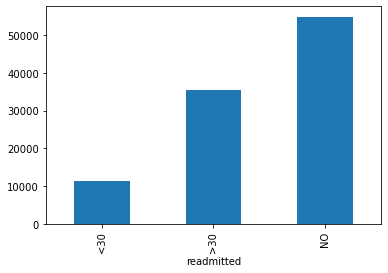

In [94]:
diabetes_cleaned.groupby(['readmitted']).size().plot(kind='bar')
plt.show()

In [95]:
# Changing the value of readmitted to 0 and 1 for future analysis

diabetes_cleaned['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in diabetes_cleaned['readmitted']])



In [126]:
#Changing values to binary type

diabetes_cleaned['admission type'] = pd.Series(['Emergency' if val == 1 \
                                               else ('Urgent' if val == 2 else '0') for val in diabetes_cleaned['admission type']])

diabetes_cleaned['admission source'] = pd.Series(['Referral' if val == 1 \
                                               else '0' for val in diabetes_cleaned['admission source']])

diabetes_cleaned['discharge type'] = pd.Series(['Discharged' if val == 1 \
                                               else '0' for val in diabetes_cleaned['discharge type']])

In [97]:
#diabetes_cleaned['diag_1'] = diabetes_cleaned['diag_2'].astype(str)
#diabetes_cleaned['diag_2'] = diabetes_cleaned['diag_1'].astype(str)
#diabetes_cleaned['diag_3'] = diabetes_cleaned['diag_1'].astype(str)

In [98]:
#Converting to two categories as male and female

diabetes_cleaned['gender'] = ['Male' if val == 'Male' else 'Female' for val in diabetes_cleaned['gender']]

In [99]:
diabetes_cleaned.head()

encounter_id  patient_nbr             race  gender      age admission type  \
0       2278392      8222157        Caucasian  Female   [0-10)         Others   
1        149190     55629189        Caucasian  Female  [10-20)      Emergency   
2         64410     86047875  AfricanAmerican  Female  [20-30)      Emergency   
3        500364     82442376        Caucasian    Male  [30-40)      Emergency   
4         16680     42519267        Caucasian    Male  [40-50)      Emergency   

  discharge type admission source  days_in_hospital  num_lab_procedures  \
0         Others         Referral                 1                  41   
1     Discharged           Others                 3                  59   
2     Discharged           Others                 2                  11   
3     Discharged           Others                 2                  44   
4     Discharged           Others                 1                  51   

   num_procedures  num_medications  outpatient  emergency visit  inpatient  \
0               0                1           0                0          0   
1               0               18           0                0          0   
2               5               13           2                0          1   
3               1               16           0                0          0   
4               0                8           0                0          0   

   diag_1  diag_2  diag_3  number_diagnoses max_glu_serum A1Cresult metformin  \
0  250.83     276  250.83                 1          None      None        No   
1     276  250.01     276                 9          None      None        No   
2     648     250     648                 6          None      None        No   
3       8  250.43       8                 7          None      None        No   
4     197     157     197                 5          None      None        No   

  repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide  \
0          No          No             No          No            No        No   
1          No          No             No          No            No        No   
2          No          No             No          No            No    Steady   
3          No          No             No          No            No        No   
4          No          No             No          No            No    Steady   

  glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol  \
0        No          No           No            No       No       No   
1        No          No           No            No       No       No   
2        No          No           No            No       No       No   
3        No          No           No            No       No       No   
4        No          No           No            No       No       No   

  troglitazone tolazamide examide citoglipton insulin glyburide-metformin  \
0           No         No      No          No      No                  No   
1           No         No      No          No      Up                  No   
2           No         No      No          No      No                  No   
3           No         No      No          No      Up                  No   
4           No         No      No          No  Steady                  No   

  glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                  No                       No                      No   
1                  No                       No                      No   
2                  No                       No                      No   
3                  No                       No                      No   
4                  No                       No                      No   

  metformin-pioglitazone change diabetesMed  readmitted  
0                     No     No          No           0  
1                     No     Ch         Yes           1  
2                     No     No         Yes           0  
3                     No     Ch         Yes           0

In [100]:
diabetes_cleaned.describe().T

count          mean           std      min         25%  \
encounter_id        101766.0  1.652016e+08  1.026403e+08  12522.0  84961194.0   
patient_nbr         101766.0  5.433040e+07  3.869636e+07    135.0  23413221.0   
days_in_hospital    101766.0  4.395987e+00  2.985108e+00      1.0         2.0   
num_lab_procedures  101766.0  4.309564e+01  1.967436e+01      1.0        31.0   
num_procedures      101766.0  1.339730e+00  1.705807e+00      0.0         0.0   
num_medications     101766.0  1.602184e+01  8.127566e+00      1.0        10.0   
outpatient          101766.0  3.693572e-01  1.267265e+00      0.0         0.0   
emergency visit     101766.0  1.978362e-01  9.304723e-01      0.0         0.0   
inpatient           101766.0  6.355659e-01  1.262863e+00      0.0         0.0   
number_diagnoses    101766.0  7.422607e+00  1.933600e+00      1.0         6.0   
readmitted          101766.0  4.608808e-01  4.984698e-01      0.0         0.0   

                            50%           75%          max  
encounter_id        152388987.0  2.302709e+08  443867222.0  
patient_nbr          45505143.0  8.754595e+07  189502619.0  
days_in_hospital            4.0  6.000000e+00         14.0  
num_lab_procedures         44.0  5.700000e+01        132.0  
num_procedures              1.0  2.000000e+00          6.0  
num_medications            15.0  2.000000e+01         81.0  
outpatient                  0.0  0.000000e+00         42.0  
emergency visit             0.0  0.000000e+00         76.0  
inpatient                   0.0  1.000000e+00         21.0  
number_diagnoses            8.0  9.000000e+00         16.0  
readmitted                  0.0  1.000000e+00          1.0

# Data Visualization

In [105]:
#Checking for patients revisit

no_of_encounter = diabetes_cleaned.groupby('patient_nbr')['encounter_id'].value_counts().reset_index(name='total')
no_of_encounter.sort_values(by = 'total',ascending = False)

patient_nbr  encounter_id  total
0               135      24437208      1
67852      78120684     259028628      1
67850      78119847     257364294      1
67849      78119676     136549326      1
67848      78114438     115544688      1
...             ...           ...    ...
33919      27187317     182280162      1
33918      27183024     193717170      1
33917      27183024     169140192      1
33916      27171972     321956798      1
101765    189502619     371459060      1

[101766 rows x 3 columns]

In [106]:
diabetes_cleaned['encounter_id'].nunique()

101766

In [42]:
#Number of patients readmitted

readmitted_count = diabetes_cleaned['readmitted'].value_counts().reset_index(name ='value count')\
                                                 .rename(columns ={'index':'readmisstion'})
readmitted_count
#

readmisstion  value count
0             0        54864
1             1        46902

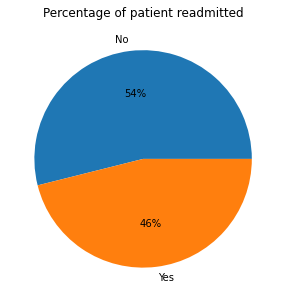

<Figure size 432x288 with 0 Axes>

In [147]:
#Visualization of percentage of patients readmitted

plt.figure(figsize=(7,5))
labels = ['No', 'Yes']
plt.pie(readmitted_count['value count'], labels = labels, autopct = '%0.0f%%')
plt.title('Percentage of patient readmitted')
plt.show()
plt.savefig('Patient Readmission')

   The above chart shows that the percentage of patient readmission is lower than the patient not admitted. This indicates that this dataset is imbalanced dastaset. 

In [149]:
#Distribution of age
age = px.histogram(diabetes_cleaned, x = 'age', title = 'Distribution of Age', text_auto ='.2s')
age.show()
plt.savefig('Readmission based on Age')

<Figure size 432x288 with 0 Axes>

The above graph shows that people between the age group 50 and 90 are mostly readmitted.

In [47]:
#Calculating the total number of patients in each category

race = diabetes_cleaned['race'].value_counts().reset_index(name = 'Count').rename(columns = {'index':'race'})
race

race  Count
0        Caucasian  78372
1  AfricanAmerican  19210
2         Hispanic   2037
3            Other   1506
4            Asian    641

In [150]:
#Visualizing which category of people mostly readmitted 

race_ = px.bar(race, x ='race', y = 'Count',color = 'race',title = 'Type of people affected', text_auto = '.2s')
race_.show()
plt.savefig('Readmission based on Race')

<Figure size 432x288 with 0 Axes>

In [151]:
#Calculating the total number of males and females

gender = diabetes_cleaned['gender'].value_counts().reset_index(name ='Counts').rename(columns ={'index':'gender'})
gender

gender  Counts
0  Female   54711
1    Male   47055

In [160]:
#Visualizing gender count

gender_ = px.bar(gender, x = 'gender', y = 'Counts',title = 'Percentage of gender affected', height = 500, width = 600, text_auto = '.2s')
gender_.show()
plt.savefig('Readmission based on Gender')

<Figure size 432x288 with 0 Axes>

In [51]:
#Calculating patients readmission based on age above 50 and gender

age_count = diabetes_cleaned.groupby(['age', 'gender'])['readmitted'].value_counts().reset_index(name ='count')
age_count_new = age_count['age'].isin(['[50-60)','[60-70)','[70-80)', '[80-90)'])
age_gender = age_count[age_count_new]
age_gender

age  gender  readmitted  count
20  [50-60)  Female           0   4616
21  [50-60)  Female           1   3956
22  [50-60)    Male           0   5055
23  [50-60)    Male           1   3629
24  [60-70)  Female           0   5844
25  [60-70)  Female           1   5218
26  [60-70)    Male           0   6240
27  [60-70)    Male           1   5181
28  [70-80)  Female           0   7244
29  [70-80)  Female           1   6743
30  [70-80)    Male           0   6280
31  [70-80)    Male           1   5801
32  [80-90)  Female           0   5378
33  [80-90)  Female           1   5137
34  [80-90)    Male           0   3518
35  [80-90)    Male           1   3164

In [152]:
#Visualizing patient readmission with age above 50

age_count = px.histogram(age_gender, x = 'age', y = 'count',color = 'readmitted', barmode ='group',text_auto='.2s', facet_row = 'gender')
age_count.show()
plt.savefig('Readmission based on Gender and Age')

<Figure size 432x288 with 0 Axes>

In [108]:
#Creating temporary dataframe for further analysis

temp_df = diabetes_cleaned[['diag_1', 'age', 'gender', 'readmitted', 'change', 'days_in_hospital']]
temp_df

diag_1      age  gender  readmitted change  days_in_hospital
0       250.83   [0-10)  Female           0     No                 1
1          276  [10-20)  Female           1     Ch                 3
2          648  [20-30)  Female           0     No                 2
3            8  [30-40)    Male           0     Ch                 2
4          197  [40-50)    Male           0     Ch                 1
...        ...      ...     ...         ...    ...               ...
101761  250.13  [70-80)    Male           1     Ch                 3
101762     560  [80-90)  Female           0     No                 5
101763      38  [70-80)    Male           0     Ch                 1
101764     996  [80-90)  Female           0     Ch                10
101765     530  [70-80)    Male           0     No                 6

[101766 rows x 6 columns]

In [129]:
age_diag = temp_df['age'].isin(['[50-60)','[60-70)', '[70-80)','[80-90)'])
age_diag_1 = temp_df[age_diag]
age_diag_1.head()

diag_1      age  gender  readmitted change  days_in_hospital
5     414  [50-60)    Male           1     No                 3
6     414  [60-70)    Male           0     Ch                 4
7     428  [70-80)    Male           1     No                 5
8     398  [80-90)  Female           0     Ch                13
11    157  [60-70)    Male           1     Ch                 7

In [132]:
#Looking for top 3 types of diagnosis procedure

top_diag_1 = age_diag_1['diag_1'].value_counts().nlargest(3)
top_diag_1.reset_index(name = 'count').rename(columns ={'index':'diag_1'})

diag_1  count
0    428   6181
1    414   5944
2    410   3186

In [133]:
#Creating a temporary column with top 3 diagnosis procedure

diag_readmit = age_diag_1["diag_1"].isin(['428','414','486'])
diag_readmit_ = age_diag_1[diag_readmit]
diag_readmit_

diag_1      age  gender  readmitted change  days_in_hospital
5         414  [50-60)    Male           1     No                 3
6         414  [60-70)    Male           0     Ch                 4
7         428  [70-80)    Male           1     No                 5
13        428  [80-90)    Male           0     No                10
29        428  [80-90)  Female           1     Ch                 5
...       ...      ...     ...         ...    ...               ...
101718    428  [70-80)  Female           0     No                 2
101722    486  [70-80)  Female           0     Ch                 3
101725    428  [70-80)  Female           0     Ch                12
101739    414  [70-80)    Male           0     No                 1
101743    486  [80-90)    Male           0     Ch                 3

[15119 rows x 6 columns]

In [154]:
#Visualizing the value count for each diagnosis type

age_count = px.histogram(diag_readmit_, x = 'age', color = 'gender', barmode ='group',text_auto='.2s', facet_row = 'diag_1', facet_col='readmitted')
age_count.show()
plt.savefig('Top 3 Diagnosis')

<Figure size 432x288 with 0 Axes>

In [135]:
#Creating temprory column with change in medication

change_readmit = age_diag_1.groupby('change')['readmitted'].value_counts().reset_index(name = 'Counts')
change_readmit

change  readmitted  Counts
0     Ch           0   19524
1     Ch           1   18763
2     No           0   24651
3     No           1   20066

In [138]:
#Visualizing patient readmission with change in medication

sns.boxplot(change_readmit, x = 'change', y = 'Counts')

ValueError: Could not interpret input 'Counts'

In [60]:
#Calculating the number of outpatient readmitted

outpatient_group = diabetes_cleaned.groupby('outpatient')['readmitted'].value_counts().reset_index(name = 'value count')
outpatient_group

outpatient  readmitted  value count
0            0           0        47912
1            0           1        37115
2            1           1         4904
3            1           0         3643
4            2           1         2160
..         ...         ...          ...
61          37           1            1
62          38           1            1
63          39           1            1
64          40           1            1
65          42           1            1

[66 rows x 3 columns]

<AxesSubplot:xlabel='outpatient', ylabel='Count'>

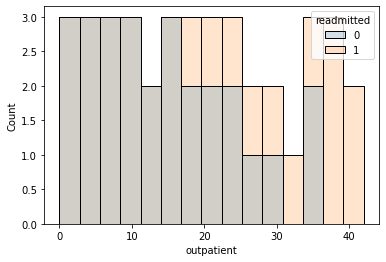

In [89]:
#Visualising out patient distribution

sns.histplot(outpatient_group, x ='outpatient', hue ='readmitted', bins = 15, alpha =0.2)

<Figure size 648x504 with 0 Axes>

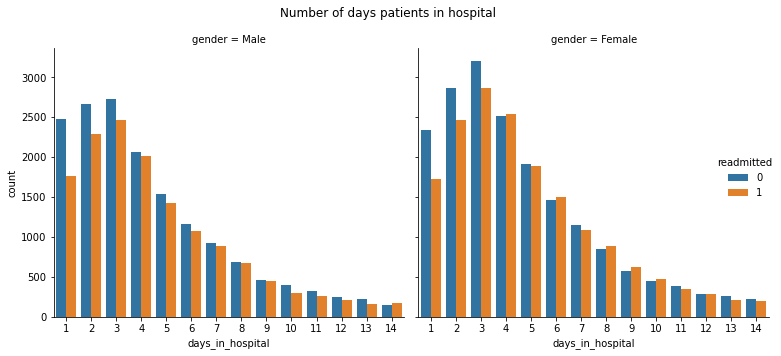

In [112]:
#Number of days Patients admitted in Hospital

plt.figure(figsize=(9,7))
sns.catplot(data =age_diag_1, x = 'days_in_hospital', hue = 'readmitted', kind = 'count', col = 'gender')
plt.suptitle('Number of days patients in hospital')
plt.tight_layout()
plt.show()
#plt.save

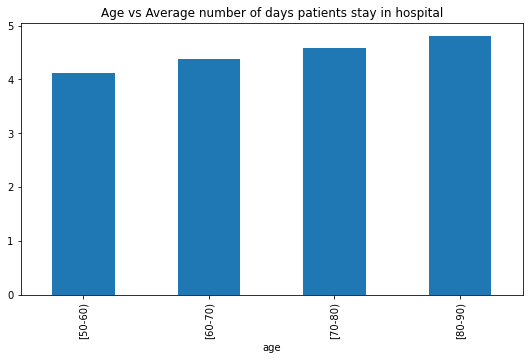

<Figure size 432x288 with 0 Axes>

In [155]:
#Average number of days patients admitted in hospital

plt.figure(figsize=(9,5))
age_diag_1.groupby('age')['days_in_hospital'].mean().plot(kind = 'bar')
plt.title('Age vs Average number of days patients stay in hospital')
plt.show()
plt.savefig('Average Number of days Patients in Hospital.jpeg')

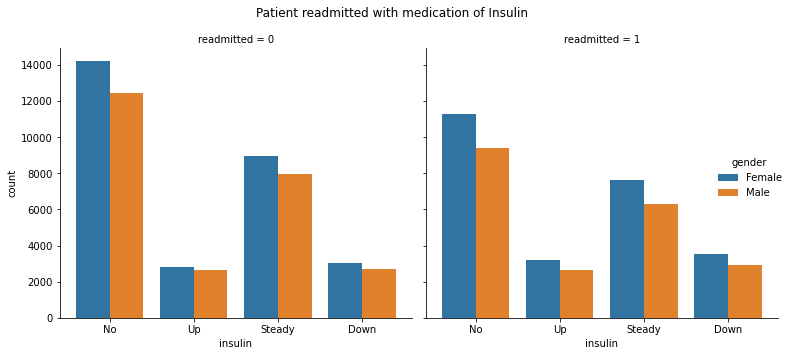

In [141]:
#Patient readmitted with medication of Insulin

sns.catplot(x = 'insulin', data = diabetes_cleaned, hue = 'gender', kind = 'count', col = 'readmitted')
plt.suptitle('Patient readmitted with medication of Insulin')
plt.tight_layout()
plt.plot()
plt.savefig('Medication with insulin.jpeg')

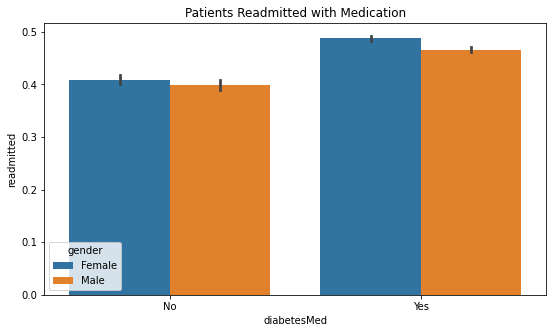

<Figure size 432x288 with 0 Axes>

In [156]:
#Patient readmission with medication

plt.figure(figsize=(9,5))
sns.barplot( data = diabetes_cleaned, x = 'diabetesMed', y = 'readmitted', hue = 'gender')
plt.title('Patients Readmitted with Medication')
plt.show()
plt.savefig('Readmission with Medication')

<Figure size 648x360 with 0 Axes>

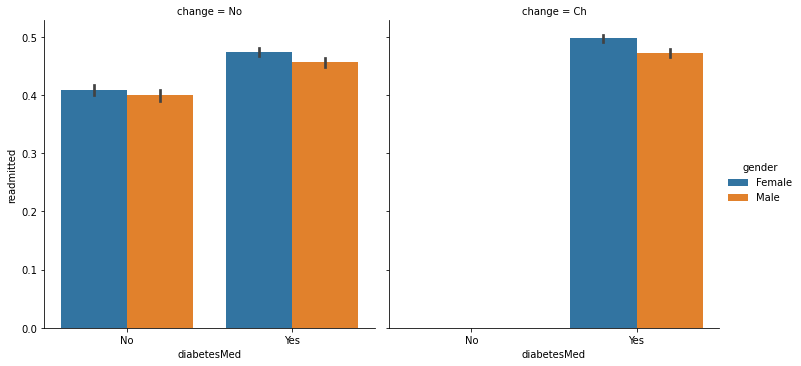

In [66]:
#Patient readmitted with change in medication 

plt.figure(figsize=(9,5))
sns.catplot(data = diabetes_cleaned, x = 'diabetesMed', y = 'readmitted', hue = 'gender', col = 'change', kind = 'bar')
plt.show()

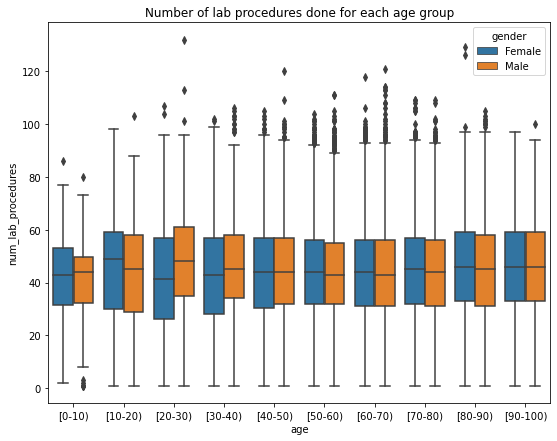

<Figure size 432x288 with 0 Axes>

In [157]:
#Number of lab procedures done based on age group

plt.figure(figsize=(9,7))
sns.boxplot(x = 'age', y = 'num_lab_procedures', data = diabetes_cleaned, hue = 'gender')
plt.title('Number of lab procedures done for each age group')
plt.show()
plt.savefig('Number of Lab Procedures')

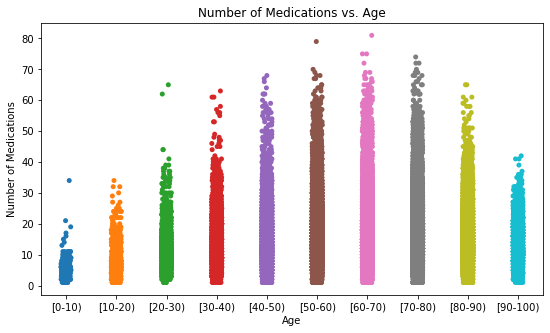

<Figure size 432x288 with 0 Axes>

In [158]:
#Visualizing the number of medications given for each age group

plt.figure(figsize=(9,5))

num_medication = diabetes_cleaned.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = num_medication)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()
plt.savefig('Number of Medications')

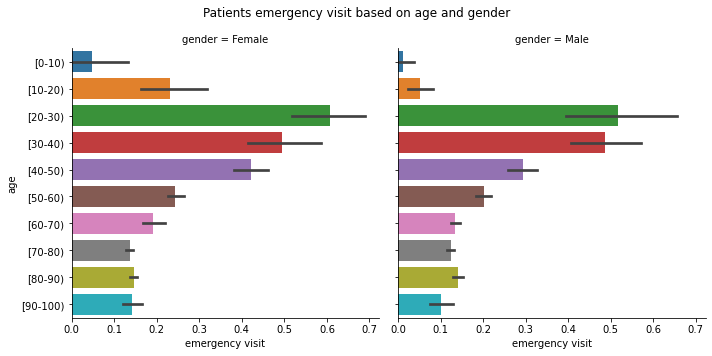

<Figure size 432x288 with 0 Axes>

In [159]:
#Patients emergency visit based on gender and age

sns.catplot(y = 'age', x = 'emergency visit', data = diabetes_cleaned, col = 'gender', kind = 'bar')
plt.suptitle('Patients emergency visit based on age and gender')
plt.tight_layout()
plt.show()
plt.savefig('Patient Emergency Visit')

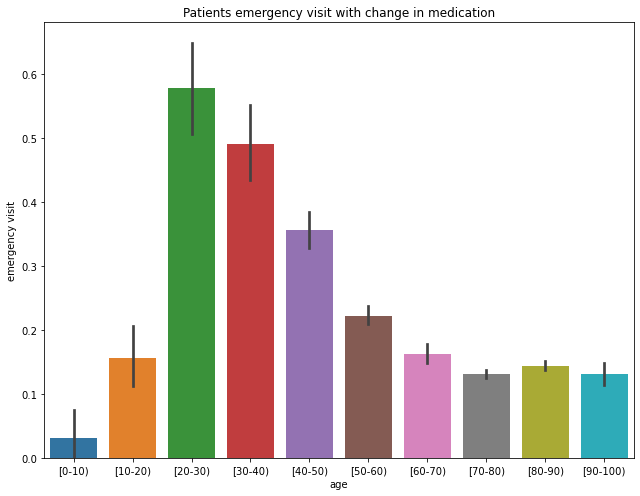

In [70]:
#Patient emergency visit with change in medication

plt.figure(figsize=(9,7))
sns.barplot(data = diabetes_cleaned,x = 'age', y = 'emergency visit')
plt.title('Patients emergency visit with change in medication')
plt.tight_layout()
plt.show()


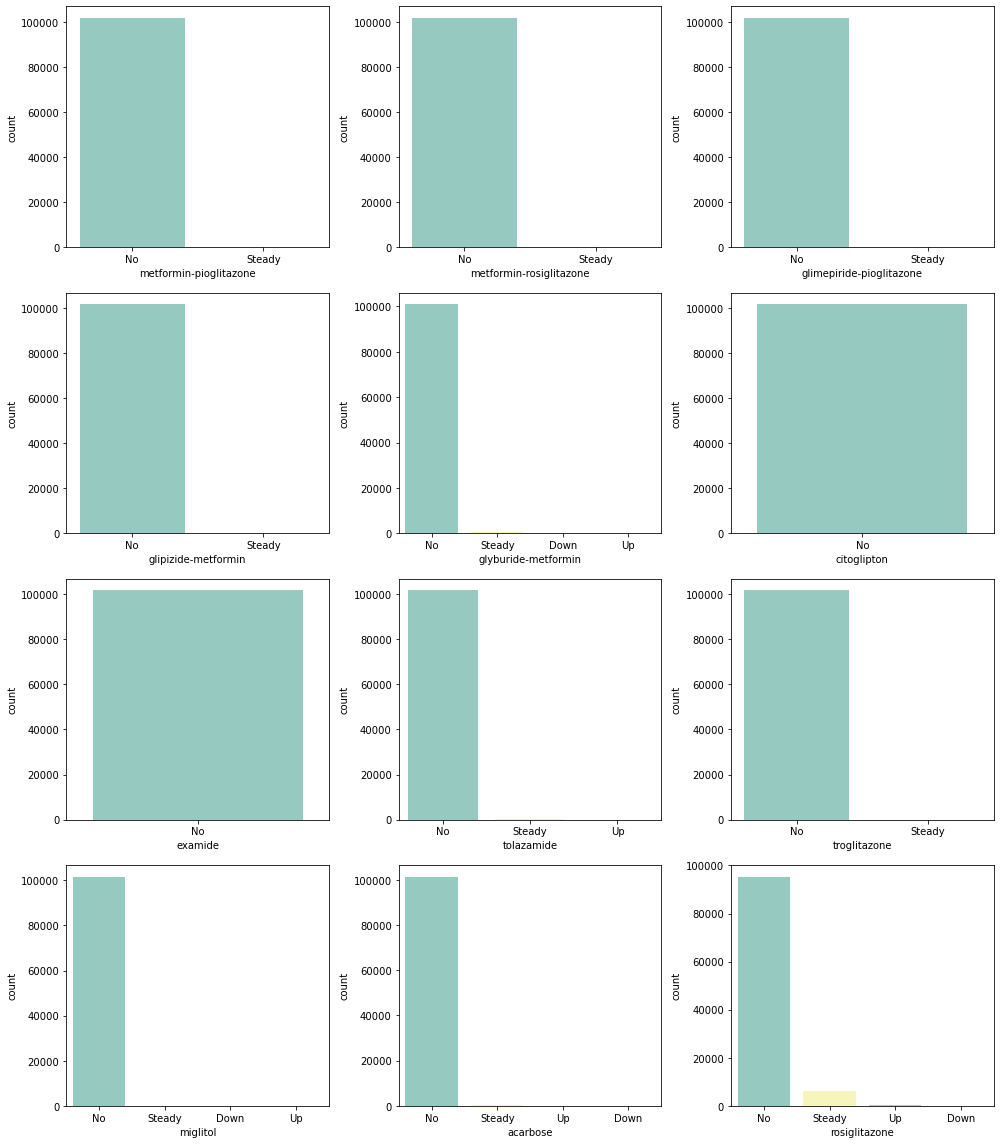

In [71]:
#Visualizing the types of medication given

cols = ['metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'glyburide-metformin', 'citoglipton',
           'examide', 'tolazamide', 'troglitazone', 'miglitol', 'acarbose', 'rosiglitazone']

fig, ax = plt.subplots(4, 3, figsize = (14, 16))

for indx, (col,axes) in list(enumerate(zip(cols, ax.flatten()))):
        sns.countplot(ax = axes, x = diabetes_cleaned[col], palette = 'Set3')
    
plt.tight_layout()    
plt.show()

In [72]:
#Loading and reading the table Diabetes Indicators

df = pd.read_csv('C:\\Users\\Owner\\OneDrive - Sify Technologies Limited\\Desktop\\Dataset\\diabetes_012_health_indIcators_BRFSS2015.CSV')

In [73]:
#Viewing first few rows

df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

In [74]:
#Changing the data type to numeric

df = df.astype(int)

In [143]:
#Checking for null values

df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

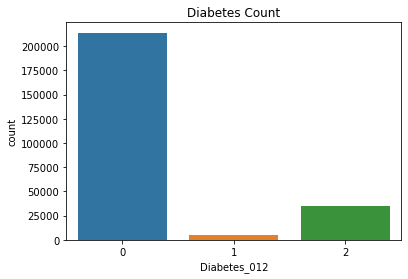

In [90]:
#Visualizing the number of patients with diabetes

sns.countplot(x = 'Diabetes_012', data = df)
plt.title('Diabetes Count')
plt.show()

In [144]:
#Finding the average for diabetes indicators

diabetic_factors = df.groupby('Diabetes_012')['Age','HighBP', 'HighChol','Stroke', 'Smoker'].mean().reset_index()
diabetic_factors

<ipython-input-144-500d6663d0bb>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Diabetes_012       Age    HighBP  HighChol    Stroke    Smoker
0             0  7.786559  0.371132  0.379171  0.031628  0.429680
1             1  9.083351  0.629022  0.620816  0.057223  0.492766
2             2  9.379053  0.752674  0.670118  0.092457  0.518220

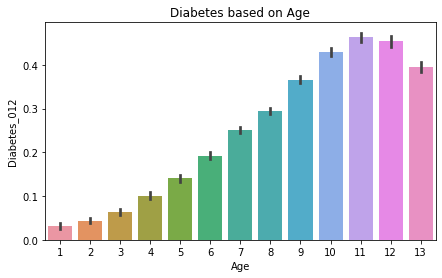

In [77]:
#Viewing total number of person with high bp based on age

plt.figure(figsize=(7,4))
sns.barplot(x ='Age', y = 'Diabetes_012', data = df)
plt.title('Diabetes based on Age')
plt.show()

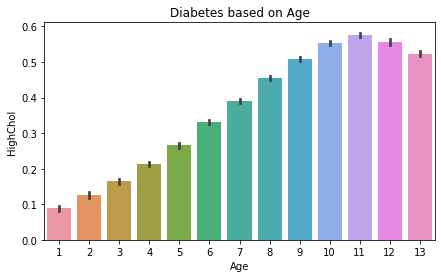

In [78]:
#High cholestrol with age

plt.figure(figsize=(7,4))
sns.barplot(x ='Age', y = 'HighChol', data = df)
plt.title('Diabetes based on Age')
plt.show()

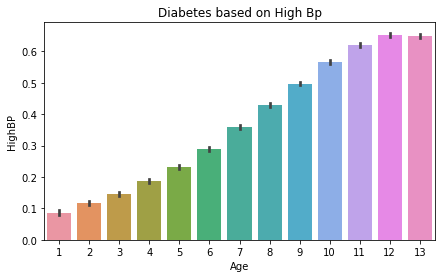

In [79]:
#High Bp with age

plt.figure(figsize=(7,4))
sns.barplot(x ='Age', y = 'HighBP', data = df)
plt.title('Diabetes based on High Bp')
plt.show()

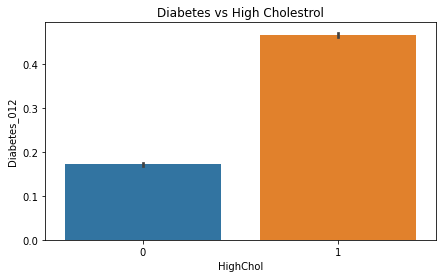

In [80]:
#High cholestrol vs diabetes

plt.figure(figsize=(7,4))
sns.barplot(x ='HighChol', y = 'Diabetes_012', data = df)
plt.title('Diabetes vs High Cholestrol')
plt.show()

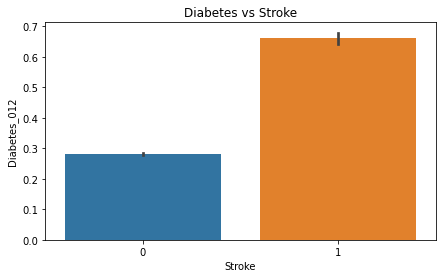

In [81]:
#Diabetes vs Stroke

plt.figure(figsize=(7,4))
sns.barplot(x ='Stroke', y = 'Diabetes_012', data = df)
plt.title('Diabetes vs Stroke')
plt.show()

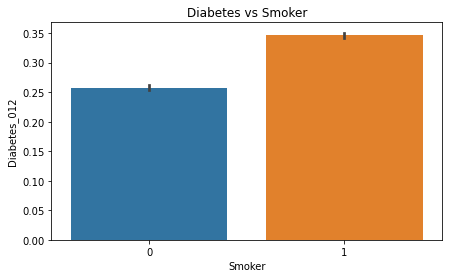

In [82]:
#Diabetes vs Smoker

plt.figure(figsize=(7,4))
sns.barplot(x ='Smoker', y = 'Diabetes_012', data = df)
plt.title('Diabetes vs Smoker')
plt.show()